# Seleccionar atributos

### 2. Importación de librerías y archivos

En las siguientes líneas se importarán la librería necesaria, la cual es **Pandas** para el manejo de datos.

In [18]:
# Importar las librerías necesarias según el análisis que se vaya a realizar
# Librería para manejo de datos
import pandas as pd
#librería para creación de gráficos
import matplotlib.pyplot as plt

In [4]:
# cargar los datos en csv
empleados= pd.read_excel('empleadosTecnologiaAlpes.xlsx', sheet_name='empleadosTecnologíaAlpes')
#Visualizar los datos
empleados.head()

,Edad,Retirado,TarifaSalarial,ID Departamento,DistanciaDesdeCasa,Educacion,CampoEducacion,EmpleadosACargo,NumeroEmpleado,NivelSatisfaccion,...,HorasEstandar,PlanSalarioComplementario,TotalAnniosTrabajados,FormacionUltimoAnnio,BalanceTrabajoVida,FechaIngresoEmpresa,AnniosEnEmpresa,AnniosRolActual,AnniosDesdeUltimaPromocion,AnniosActualDirector
0,41,Si,1102,3,1,2,Ciencias de la vida,1.0,1,2,...,80,0,8,0,1,2015-07-26,6,4,0,5
1,49,No,279,1,8,1,Ciencias de la vida,1.0,2,3,...,80,1,10,3,3,2011-02-15,10,7,1,7
2,37,Si,1373,1,2,2,Otro,1.0,4,4,...,80,0,7,3,3,2021-06-02,0,0,0,0
3,33,No,1392,1,3,4,Ciencias de la vida,1.0,5,4,...,80,0,8,3,3,2013-09-26,8,7,3,0
4,27,No,591,1,2,1,Medicina,1.0,7,1,...,80,1,6,3,3,2019-03-02,2,2,2,2


In [10]:
empleados.dtypes

Edad                                               int64
Retirado                                          object
TarifaSalarial                                     int64
ID Departamento                                    int64
DistanciaDesdeCasa                                 int64
Educacion                                          int64
CampoEducacion                                    object
EmpleadosACargo                                  float64
NumeroEmpleado                                     int64
NivelSatisfaccion                                  int64
Genero                                            object
SalarioPorHora                                     int64
NivelInvolucramiento                               int64
NivelResponsabilidad                               int64
Rol ID                                             int64
SatisfaccionTrabajo                                int64
EstadoCivil                                       object
SalarioMensual                 

### 3. Eliminando atributos

In [14]:
#Eliminación de varibles de las ordenes
empleados_mod=empleados[['Genero','TarifaSalarial', 'SalarioMensual']]
empleados_mod.head()

,Genero,TarifaSalarial,SalarioMensual
0,Femenino,1102,5993
1,Masculino,279,5130
2,Masculino,1373,2090
3,Femenino,1392,2909
4,Masculino,591,3468


### 4. Creación de atributos de valor

In [15]:
#Suma salario total
empleados_mod['Salario total']= empleados_mod['TarifaSalarial']+empleados_mod['SalarioMensual']
empleados_mod.head()

C:\Users\Edwar\AppData\Local\Temp\ipykernel_11712\3770739848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empleados_mod['Salario total']= empleados_mod['TarifaSalarial']+empleados_mod['SalarioMensual']


,Genero,TarifaSalarial,SalarioMensual,Salario total
0,Femenino,1102,5993,7095
1,Masculino,279,5130,5409
2,Masculino,1373,2090,3463
3,Femenino,1392,2909,4301
4,Masculino,591,3468,4059


In [16]:
# Realizar los intervalos
#Establcer cantidad de intervalos deseados
numero_intervalos=5
empleados_mod['intervalo_tarifa']=pd.cut(empleados_mod['Salario total'],numero_intervalos)
#Visualizar el resultado
empleados_mod.head()

C:\Users\Edwar\AppData\Local\Temp\ipykernel_11712\2720303720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empleados_mod['intervalo_tarifa']=pd.cut(empleados_mod['Salario total'],numero_intervalos)


,Genero,TarifaSalarial,SalarioMensual,Salario total,intervalo_tarifa
0,Femenino,1102,5993,7095,"(5346.0, 9354.0]"
1,Masculino,279,5130,5409,"(5346.0, 9354.0]"
2,Masculino,1373,2090,3463,"(1317.96, 5346.0]"
3,Femenino,1392,2909,4301,"(1317.96, 5346.0]"
4,Masculino,591,3468,4059,"(1317.96, 5346.0]"


Vemos como con la eliminación de valores poco útilies para el análisis podemos obtener mejores resultados, además crear valor a partir de los atributos con los que se cuenta

In [17]:
#Elegir genero
genero='Femenino'
empleados_mod[empleados_mod['Genero']==genero].groupby(['Genero','intervalo_tarifa']).count()[['Salario total']]

Salario total
Genero   intervalo_tarifa                 
Femenino (1317.96, 5346.0]             257
         (5346.0, 9354.0]              184
         (9354.0, 13362.0]              64
         (13362.0, 17370.0]             43
         (17370.0, 21378.0]             41

### 5. Histograma

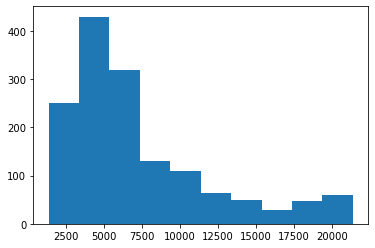

In [19]:
plt.hist(empleados_mod['Salario total'])
plt.show()